In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from table import Table

In [2]:
def display_img(img, cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB),cmap=cmap)
    
def transform(pt, m):
    x, y = pt
    
    new_x = (m[0,0]*x + m[0,1]*y + m[0,2]) / (m[2,0]*x + m[2,1]*y + m[2,2])
    new_y = (m[1,0]*x + m[1,1]*y + m[1,2]) / (m[2,0]*x + m[2,1]*y + m[2,2])
    
    return new_x, new_y

In [3]:
img_v = cv2.imread('ImagesHD/frame-0-102094.jpg')

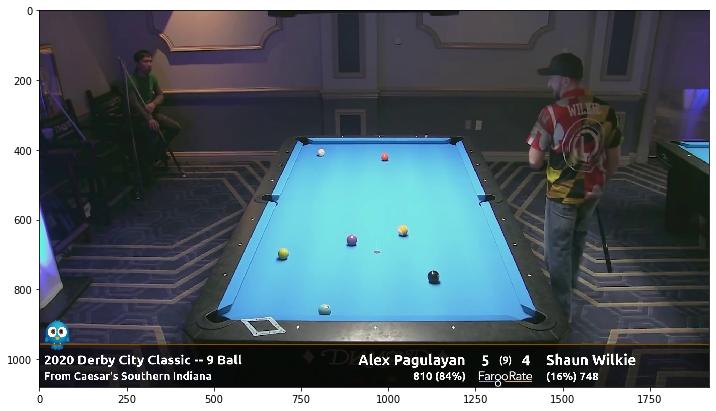

In [4]:
display_img(img_v)

In [5]:
img_h = cv2.imread('ImagesHD/frame-0-7972.jpg')

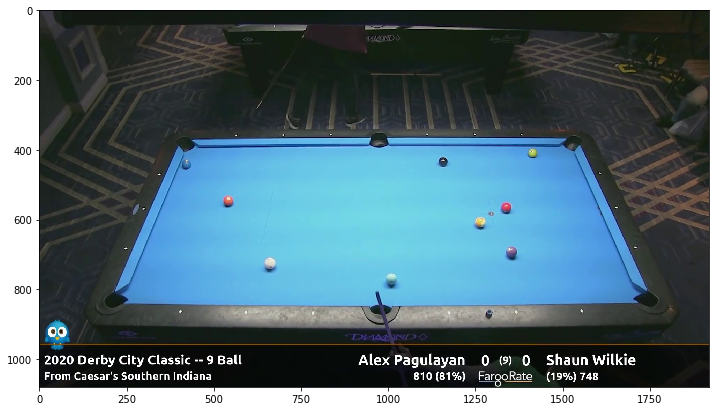

In [6]:
display_img(img_h)

In [7]:
t = Table()

In [8]:
orientation, table = t.find_table(img_v)
orientation

'Vertical'

In [9]:
t.h_corners

In [10]:
h_corners = [(420, 385), (1525, 385), (1730, 830), (215, 830)]

In [11]:
img_h_cp = img_h.copy()
for c in h_corners:
    cv2.circle(img_h_cp, (c), 10, (0,255,0), 3)

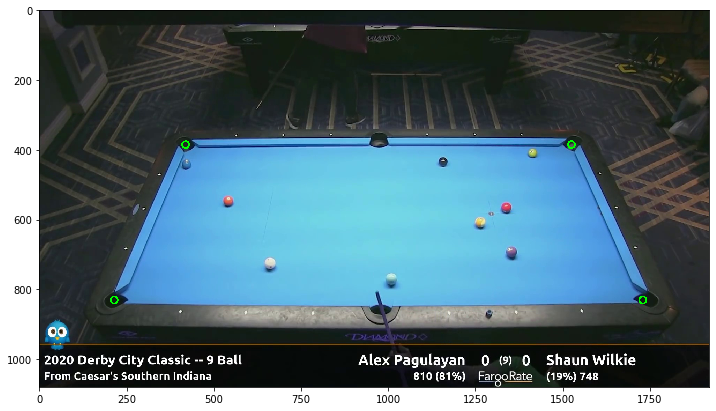

In [12]:
display_img(img_h_cp)

In [13]:
h_corners_new = [(400,0),(400,800),(0,800),(0,0)]

In [14]:
m_h = cv2.getPerspectiveTransform(np.array(h_corners, dtype=np.float32), np.array(h_corners_new, dtype=np.float32))

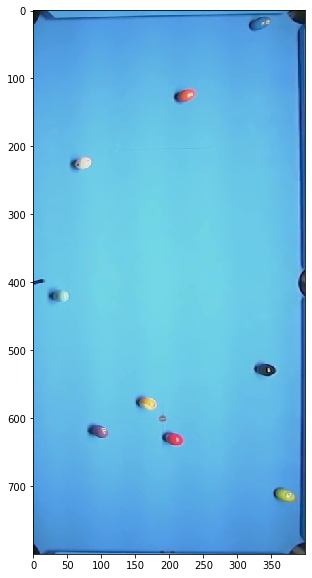

In [15]:
display_img(cv2.warpPerspective(img_h, m_h, (400,800)))

In [16]:
transform((1300,550),m_h)

(221.24692737430166, 608.4290502793295)

In [17]:
t.v_corners

In [18]:
v_corners = [(760, 370), (1190, 370), (1415, 885), (500, 885)]

In [19]:
img_v_cp = img_v.copy()
for c in v_corners:
    cv2.circle(img_v_cp, (c), 10, (0,255,0), 3)

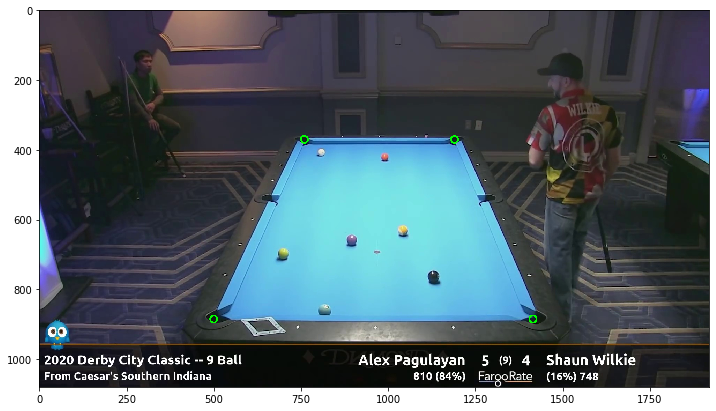

In [20]:
display_img(img_v_cp)

In [21]:
v_corners_new= [(0,0),(400,0),(400,800),(0,800)]

In [22]:
m_v = cv2.getPerspectiveTransform(np.array(v_corners, dtype=np.float32), np.array(v_corners_new, dtype=np.float32))

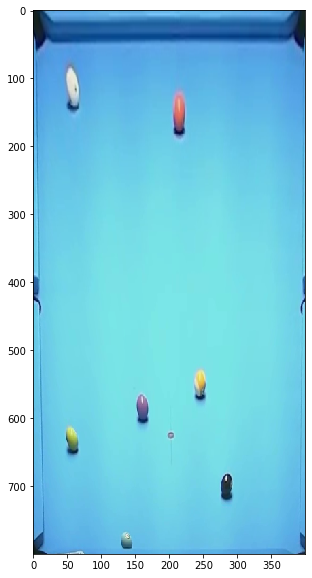

In [23]:
display_img(cv2.warpPerspective(img_v, m_v, (400,800)))

In [132]:
transform((1000,675),  m_v)

(219.72250423011832, 604.4263959390863)